# Laboratorio 9

In [25]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from vega_datasets import data

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos un conjunto de datos _famoso_, el GapMinder. Esta es una versión reducida que solo considera países, ingresos, salud y población. 

¿Hay alguna forma natural de agrupar a estos países?

In [26]:
gapminder = data.gapminder_health_income()
gapminder.head()

,country,income,health,population
0,Afghanistan,1925,57.63,32526562
1,Albania,10620,76.00,2896679
2,Algeria,13434,76.50,39666519
3,Andorra,46577,84.10,70473
4,Angola,7615,61.00,25021974


## Ejercicio 1

(1 pto.)

Realiza un Análisis exploratorio, como mínimo un `describe` del dataframe y una visualización adecuada, por ejemplo un _scatter matrix_ con los valores numéricos.

In [27]:
gapminder.describe()

,income,health,population
count,187.000000,187.000000,1.870000e+02
mean,17232.240642,71.673262,3.908887e+07
std,19310.632882,7.748959,1.432898e+08
min,599.000000,48.500000,5.299300e+04
25%,3585.500000,65.500000,2.248920e+06
50%,10996.000000,73.130000,8.544586e+06
75%,23834.000000,77.700000,2.769388e+07
max,132877.000000,84.100000,1.376049e+09


array([[<AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='health', ylabel='income'>,
        <AxesSubplot:xlabel='population', ylabel='income'>],
       [<AxesSubplot:xlabel='income', ylabel='health'>,
        <AxesSubplot:xlabel='health', ylabel='health'>,
        <AxesSubplot:xlabel='population', ylabel='health'>],
       [<AxesSubplot:xlabel='income', ylabel='population'>,
        <AxesSubplot:xlabel='health', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>]],
      dtype=object)

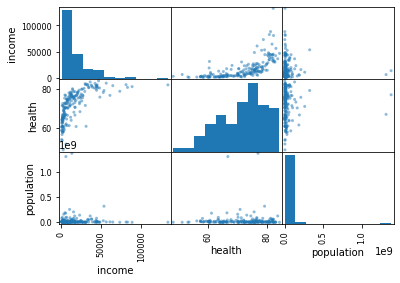

In [28]:

pd.plotting.scatter_matrix(gapminder)

__Pregunta:__ ¿Hay alguna variable que te entregue indicios a simple vista donde se puedan separar países en grupos?

__Respuesta:__ Las variables health e income indican a simple vista indicios donde se pueden separar paises en grupos

## Ejercicio 2

(1 pto.)

Aplicar un escalamiento a los datos antes de aplicar nuestro algoritmo de clustering. Para ello, definir la variable `X_raw` que corresponde a un `numpy.array` con los valores del dataframe `gapminder` en las columnas _income_, _health_ y  _population_. Luego, definir la variable `X` que deben ser los datos escalados de `X_raw`.

In [29]:
from sklearn.preprocessing import StandardScaler

In [33]:
#Debemos eliminar la columna country , para tener las columnas pedidas
X_raw = gapminder.drop("country", axis = 1).to_numpy()
x1 = StandardScaler()
x1.fit(X_raw)
X = x1.transform(X_raw)

## Ejercicio 3

(1 pto.)

Definir un _estimator_ `KMeans` con `k=3` y `random_state=42`, luego ajustar con `X` y finalmente, agregar los _labels_ obtenidos a una nueva columna del dataframe `gapminder` llamada `cluster`. Finalmente, realizar el mismo gráfico del principio pero coloreado por los clusters obtenidos.


In [34]:
from sklearn.cluster import KMeans

In [40]:
k = 3
kmeans = KMeans(n_clusters=k,random_state = 42)
kmeans.fit(X)
clusters = kmeans.labels_
gapminder["cluster"] = clusters

array([[<AxesSubplot:xlabel='income', ylabel='income'>,
        <AxesSubplot:xlabel='health', ylabel='income'>,
        <AxesSubplot:xlabel='population', ylabel='income'>,
        <AxesSubplot:xlabel='cluster', ylabel='income'>],
       [<AxesSubplot:xlabel='income', ylabel='health'>,
        <AxesSubplot:xlabel='health', ylabel='health'>,
        <AxesSubplot:xlabel='population', ylabel='health'>,
        <AxesSubplot:xlabel='cluster', ylabel='health'>],
       [<AxesSubplot:xlabel='income', ylabel='population'>,
        <AxesSubplot:xlabel='health', ylabel='population'>,
        <AxesSubplot:xlabel='population', ylabel='population'>,
        <AxesSubplot:xlabel='cluster', ylabel='population'>],
       [<AxesSubplot:xlabel='income', ylabel='cluster'>,
        <AxesSubplot:xlabel='health', ylabel='cluster'>,
        <AxesSubplot:xlabel='population', ylabel='cluster'>,
        <AxesSubplot:xlabel='cluster', ylabel='cluster'>]], dtype=object)

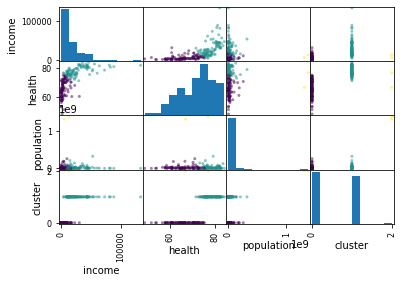

In [39]:
pd.plotting.scatter_matrix(gapminder, c = gapminder["cluster"])

## Ejercicio 4

(1 pto.)

__Regla del codo__

__¿Cómo escoger la mejor cantidad de _clusters_?__

En este ejercicio hemos utilizado que el número de clusters es igual a 3. El ajuste del modelo siempre será mejor al aumentar el número de clusters, pero ello no significa que el número de clusters sea el apropiado. De hecho, si tenemos que ajustar $n$ puntos, claramente tomar $n$ clusters generaría un ajuste perfecto, pero no permitiría representar si existen realmente agrupaciones de datos.

Cuando no se conoce el número de clusters a priori, se utiliza la [regla del codo](https://jarroba.com/seleccion-del-numero-optimo-clusters/), que indica que el número más apropiado es aquel donde "cambia la pendiente" de decrecimiento de la la suma de las distancias a los clusters para cada punto, en función del número de clusters.

A continuación se provee el código para el caso de clustering sobre los datos estandarizados, leídos directamente de un archivo preparado especialmente.En la línea que se declara `kmeans` dentro del ciclo _for_ debes definir un estimador K-Means, con `k` clusters y `random_state` 42. Recuerda aprovechar de ajustar el modelo en una sola línea.

In [22]:
elbow = pd.Series(name="inertia", dtype="float64").rename_axis(index="k")
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    elbow.loc[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
elbow = elbow.reset_index()

NameError: name 'KMeans' is not defined

In [ ]:
alt.Chart(elbow).mark_line(point=True).encode(
    x="k:O",
    y="inertia:Q"
).properties(
    height=600,
    width=800
)

__Pregunta:__ Considerando los datos (países) y el gráfico anterior, ¿Cuántos clusters escogerías?

__Respuesta:__ # FIX ME PLEASE #